In [150]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [151]:
N_EPOCHS = 1000
rmse_list = []

In [152]:
x = tf.placeholder(tf.float32, [None,3])
w = tf.Variable(tf.random_normal([3,3]))
b = tf.Variable(tf.zeros([1]))

In [153]:
def fwdNode(x, w, b):
    Input = tf.add(tf.matmul(x,w), b)
    Output = tf.sigmoid(Input)
    return Output

In [154]:
#Feed
Pred = fwdNode(x, w, b)

In [155]:
Out = tf.placeholder(tf.float32, [None,3])
cost_func = tf.reduce_mean(tf.square(Out - Pred))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cost_func)

In [156]:
data_csv = pd.read_csv('../myCSVData.csv')
X = data_csv[['in1','in2','in3']]
y = data_csv[['out1','out2','out3']]
#X, y

In [157]:
X_train = X[:40000]
X_test = X[40000:]
y_train = y[:40000]
y_test = y[40000:]

In [158]:
# Evaluation
rmse_a = tf.placeholder(tf.float32, [None, 3])
rmse_b = tf.placeholder(tf.float32, [None, 3])
rmse = tf.reduce_mean(tf.square(a - b))

In [159]:
init = tf.global_variables_initializer()

In [160]:
with tf.Session() as sess:
    
    sess.run(init)
    #print (sess.run(rmse_a))
    for epoch in range(N_EPOCHS):
        #print (epoch + 1)
        sess.run(train_step, feed_dict = {x:X_train, Out:y_train})
       # print (sess.run(cost_func, feed_dict ))
        pred = sess.run(Pred, feed_dict = {x:X_test})
        my_rmse = sess.run(cost_func, feed_dict={x: X_test, Out:y_test})
        #print ("\nEpoch : ", (epoch+1), "\nRMSE : ", my_rmse)
        #print (pred)
        #print (sess.run(rmse, feed_dict = {rmse_a:X_test, rmse_b:y_test}))
        rmse_list += [my_rmse]

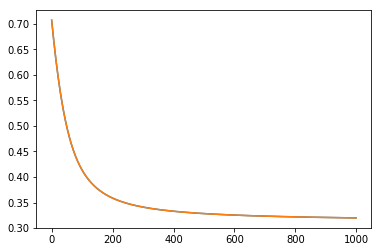

In [161]:
#rmse_list
plt.plot(list(enumerate(range(len(rmse_list)))),rmse_list)
#what